# Introduction to Bokeh and Seaborn

In [81]:
from bokeh.plotting import figure, show, gridplot
from bokeh.io import output_notebook

import seaborn as sns
import numpy as np
import pandas as pd

%matplotlib inline
output_notebook()

Loading BokehJS ...

### Bokeh
- 


### Seaborn
- Tight interaction with pandas dataframes
- focus on schemes and color palettes

## Simple Bokeh Plot

In [22]:
x = np.arange(-10, 10)
y = x ** 2

p.line(x, y)
show(p)

## Plot with multiple Lines

In [32]:
x = np.arange(0, 3, 0.1)

p = figure(title="Simple Plot with multiple Lines")
p.circle(x, x**2)
p.line(x, np.log(x))
show(p)

## Colorful Plots

In [44]:
N = 4000
x = np.random.random(size=N) * 100
y = np.random.random(size=N) * 100

radii = np.random.random(size=N) * 1.5
colors = [
    "#%02x%02x%02x" % (int(r), int(g), 150) for r, g in zip(50+2*x, 50+2*y)
]

p = figure(x_range=(0,100), y_range=(0,100))
p.circle(x,y, radius=radii, fill_color=colors, fill_alpha=0.6, line_color=None)
show(p)

## Multiple Plots in Grid

In [48]:
N = 100
x = np.linspace(0, 4*np.pi, N)
y0 = np.sin(x)
y1 = np.cos(x)
y2 = np.sin(x) + np.cos(x)


s1 = figure(width=250, plot_height=250, title=None)
s1.circle(x, y0, size=10, color="navy", alpha=0.5)

s2 = figure(width=250, height=250, x_range=s1.x_range, y_range=s1.y_range, title=None)
s2.triangle(x, y1, size=10, color="firebrick", alpha=0.5)

s3 = figure(width=250, height=250, x_range=s1.x_range, title=None)
s3.square(x, y2, size=10, color="olive", alpha=0.5)

# Hidden Toolbar but panning is still possible
p = gridplot([[s1, s2, s3]], toolbar_location=None)

# show the results
show(p)

## Seaborn Linear regression

In [55]:
sns.set(style="ticks")

df = sns.load_dataset("anscombe")
df

dataset     x      y
0        I  10.0   8.04
1        I   8.0   6.95
2        I  13.0   7.58
3        I   9.0   8.81
4        I  11.0   8.33
5        I  14.0   9.96
6        I   6.0   7.24
7        I   4.0   4.26
8        I  12.0  10.84
9        I   7.0   4.82
10       I   5.0   5.68
11      II  10.0   9.14
12      II   8.0   8.14
13      II  13.0   8.74
14      II   9.0   8.77
15      II  11.0   9.26
16      II  14.0   8.10
17      II   6.0   6.13
18      II   4.0   3.10
19      II  12.0   9.13
20      II   7.0   7.26
21      II   5.0   4.74
22     III  10.0   7.46
23     III   8.0   6.77
24     III  13.0  12.74
25     III   9.0   7.11
26     III  11.0   7.81
27     III  14.0   8.84
28     III   6.0   6.08
29     III   4.0   5.39
30     III  12.0   8.15
31     III   7.0   6.42
32     III   5.0   5.73
33      IV   8.0   6.58
34      IV   8.0   5.76
35      IV   8.0   7.71
36      IV   8.0   8.84
37      IV   8.0   8.47
38      IV   8.0   7.04
39      IV   8.0   5.25
40      IV  19.0  12.50
41      IV   8.0   5.56
42      IV   8.0   7.91
43      IV   8.0   6.89

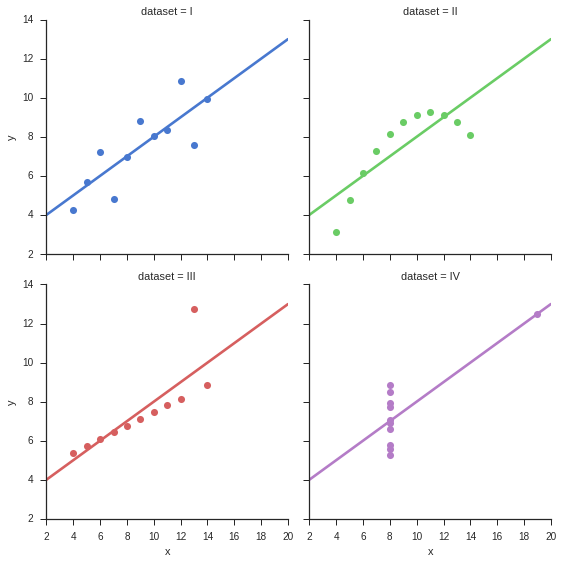

In [56]:
# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", size=4,
           scatter_kws={"s": 50, "alpha": 1})

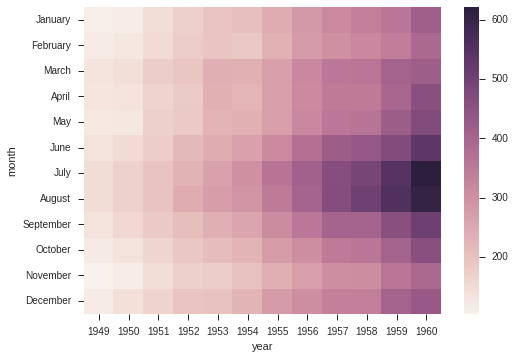

In [62]:
flights_long = sns.load_dataset("flights")
flights = flights_long.pivot("month", "year", "passengers")
sns.heatmap(flights)

## Univariate Distributions

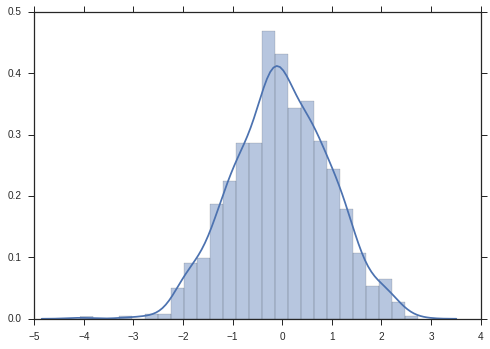

In [74]:
x = np.random.normal(size=1000)
sns.distplot(x) # parameters: hist, rug, kde

## Bivariate Distributions

In [ ]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])
x, y = np.random.multivariate_normal(mean, cov, 1000).T

sns.jointplot(x="x", y="y", data=df)
sns.jointplot(x=x, y=y, kind="hex");
sns.jointplot(x="x", y="y", data=df, kind="kde");